# (Ford GoBike System Data)
## by (Mostafa Khalil Mohamed)

## Preliminary Wrangling

> This exploration_file explores a dataset containing the trip data of the ford gobike for April 2019
, and this dataset has (183412 rows and 16 columns)


>the main column is duration_sec : it is about the time of trips by seconds

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## display all columns and rows

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Gathering data


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assessing Data

In [5]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())
print(df.dtypes)

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [6]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
39951,196,2019-02-22 23:31:46.9580,2019-02-22 23:35:03.2640,73.0,Pierce St at Haight St,37.771793,-122.433708,105.0,16th St at Prosper St,37.764285,-122.431804,5371,Subscriber,1988.0,Male,No
121372,789,2019-02-11 15:23:28.8050,2019-02-11 15:36:38.2500,265.0,Ninth St at Parker St,37.858868,-122.291209,245.0,Downtown Berkeley BART,37.870139,-122.268422,1023,Subscriber,1985.0,Other,No
2251,521,2019-02-28 18:14:27.8980,2019-02-28 18:23:09.0590,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5464,Subscriber,1988.0,Male,Yes
92699,334,2019-02-15 18:32:44.9700,2019-02-15 18:38:19.5830,241.0,Ashby BART Station,37.852477,-122.270213,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,791,Subscriber,1983.0,Male,No
63888,3263,2019-02-20 12:48:08.5870,2019-02-20 13:42:32.5710,298.0,Oak St at 1st St,37.322125,-121.881090,299.0,Bestor Art Park,37.323678,-121.874119,2118,Subscriber,1957.0,Male,Yes


In [7]:
# check for duplicat
df.duplicated().sum()

0

In [8]:
# check for null
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
df.start_station_name.value_counts()

Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                                           

In [10]:
print(df.member_gender.unique())
df.member_gender.value_counts()

['Male' nan 'Other' 'Female']


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [12]:
print(df.user_type.unique())
df.user_type.value_counts()

['Customer' 'Subscriber']


Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

## Data Cleaning
- convert stat_time column from object to datetime
- convert end_time column from object to datetime
- remove nan value from member_gender , member_birth_year columns, start_station_id,start_station_name,end_station_id,end_station_name
-  Calculate member_age from member_birth_year
- change type of bike_share_for_all_trip from object to bool type

## Make a copy

In [13]:
df_clean = df.copy()

In [14]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Definfe
- start_time column is object instead of datetime
- convert end_time column from object to datetime

## code

In [15]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

## Test

In [16]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

## Define
- remove nan value from member_gender , member_birth_year columns

## code

In [17]:
df_clean.dropna(inplace= True)

## Test

In [18]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Define
- Calculate member_age from member_birth_year

## Code

In [20]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

## Test

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [22]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0


## Define
- change type of bike_share_for_all_trip from object to bool type

## Code

In [23]:
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('bool')

## Test

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [26]:
## save the clean data into csv
df_clean.to_csv('cleaning_ford_gobike.csv',index=False)

### What is the structure of  the  dataset?

> after cleaning the original dataset, the cleaning dataset has 17000+ bike rides that happen in 2019 in the San Francisco Bay Area. with 17 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, member_age). Most variables are 10 numerical, and others are 2 datetime, 4 object type and 1 is boolean type 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how trip duration is dependent on other features such as: age, start station, end station, user type,  gender, member_age from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that trip duration will have the strongest effect on each the start stations and end stations becouse the crowded places should receive more rides. I also think that user_type, age, and gender will have effects on trip duration.

## Univariate Exploration

> lets start our exploration by looking at the main variable of interest duration_sec

Text(0, 0.5, 'number of trips')

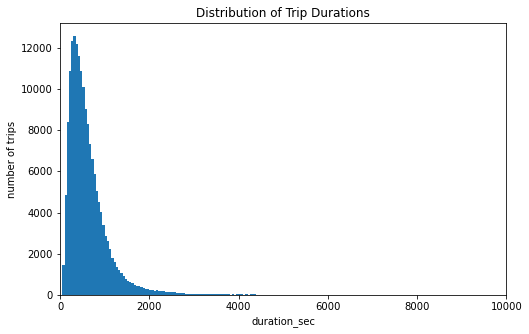

In [25]:
# here we use bins for more details
plt.figure(figsize=[8, 5])
bins = np.arange(0, df_clean['duration_sec'].max()+50, 50)
plt.hist(data = df_clean, x ="duration_sec", bins = bins);
plt.title('Distribution of Trip Durations')
plt.xlim(0,10000)
plt.xlabel('duration_sec')
plt.ylabel('number of trips')

>Trip duration is mostly centered on values which are less than 2000 seconds 
 - Next up, the first predictor variable of interest: Start Station and End Station

In [26]:
df_clean.start_station_id.value_counts().index

Float64Index([ 58.0,  67.0,  81.0,  21.0,   3.0,  30.0,  15.0,  22.0,  16.0,
                5.0,
              ...
              225.0, 388.0, 398.0, 389.0, 301.0, 234.0,  51.0, 224.0, 300.0,
              344.0],
             dtype='float64', length=329)

Text(0.5, 1.0, 'distribution of start station')

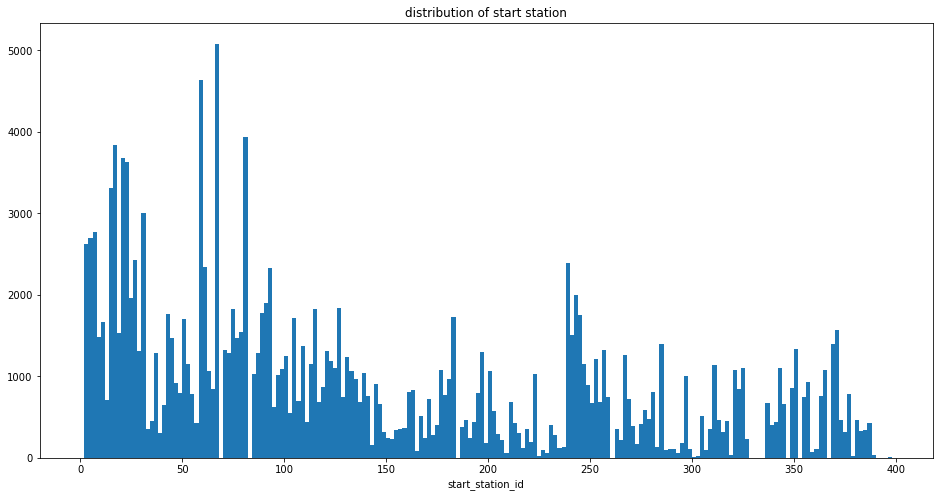

In [27]:
## start_station_id
plt.figure(figsize=[16,8])
bins = np.arange(0, df_clean['start_station_id'].max()+2,2)
plt.hist(data=df_clean,x = 'start_station_id',bins=bins);
plt.xlabel('start_station_id')
plt.title('distribution of start station')

Text(0.5, 1.0, 'distribution of end station')

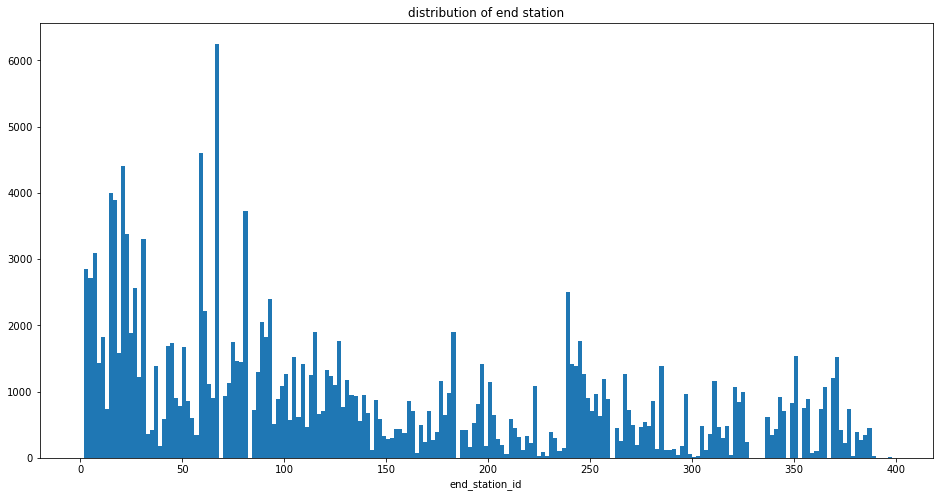

In [28]:
## end_station_id
plt.figure(figsize=[16,8])
bins = np.arange(0, df_clean['end_station_id'].max()+2,2)
plt.hist(data=df_clean,x = 'end_station_id',bins=bins);
plt.xlabel('end_station_id')
plt.title('distribution of end station')

> In the case of start and end station, as you can see, the start stations and end stations are same.
> -  I'll now move on to the other variables in the dataset: age, user type, and gender

In [29]:
## member_age
df_clean.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

### Note: max age is 141! Not usual

In [30]:
# Let's remove outliers. Only keep record with member_age below 90.
df_clean = df_clean[df_clean['member_age'] <= 90]

In [31]:
df_clean.member_age.describe()

count    174875.000000
mean         34.160274
std           9.968641
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: member_age, dtype: float64

Text(0.5, 1.0, 'distribution of member_age')

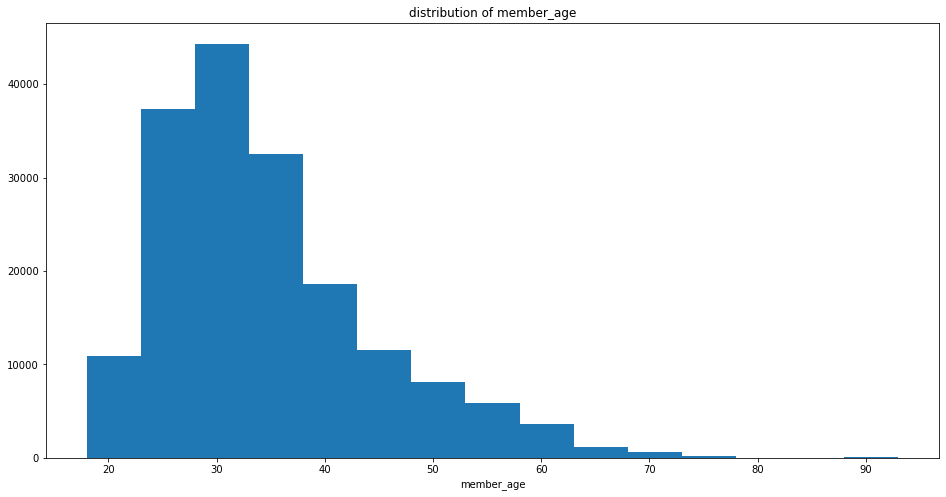

In [32]:
plt.figure(figsize=[16,8])
bins = np.arange(18, df_clean['member_age'].max()+5,5)
plt.hist(data = df_clean, x = 'member_age', bins = bins);

plt.xlabel('member_age')
plt.title('distribution of member_age')

> There are many bikers are around age 30. There are not that many bikers above age 50

<AxesSubplot:xlabel='user_type', ylabel='count'>

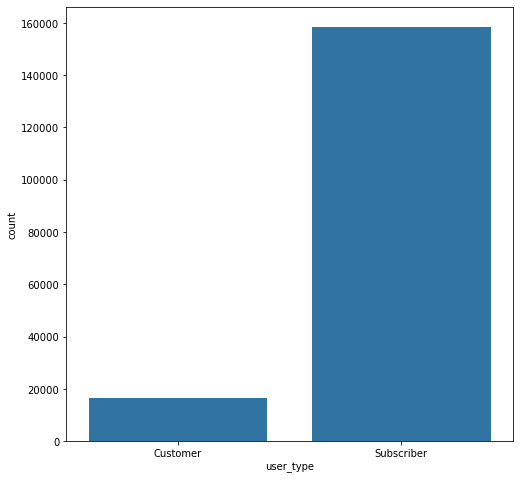

In [33]:
## plotting user_type
plt.figure(figsize=[8,8])
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean,x='user_type',color=base_color)

> 'Subscriber' user are more than 'Customer' user

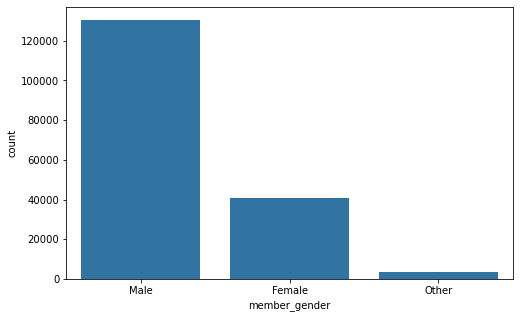

In [34]:
## plotting member_gender but first order the member_age ascending
gender = df_clean['member_gender'].value_counts().index
plt.figure(figsize=[8,5])
sb.countplot(data = df_clean, x = 'member_gender', color = base_color, order=gender);

> Male bikers are more than of female bikers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> User-wise, there were more male riders than female, and most members were subscribers compared to casual riders.  and most were around 25 to 40 years old.

>  Most rides were quick and short, lasted between 5 to 10 minutes. 

> No transformation was needed luckily due to the straightforwardness of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> Used .describe() in member_age column to get the outliers, and remove unusual age fom this column



> start station and end station is plotted in a larger plot so that it gives a better insight regarding traffic of bikes at certain stations.

## Bivariate Exploration



Text(0.5, 1.0, 'Relation between duration_sec and member_age')

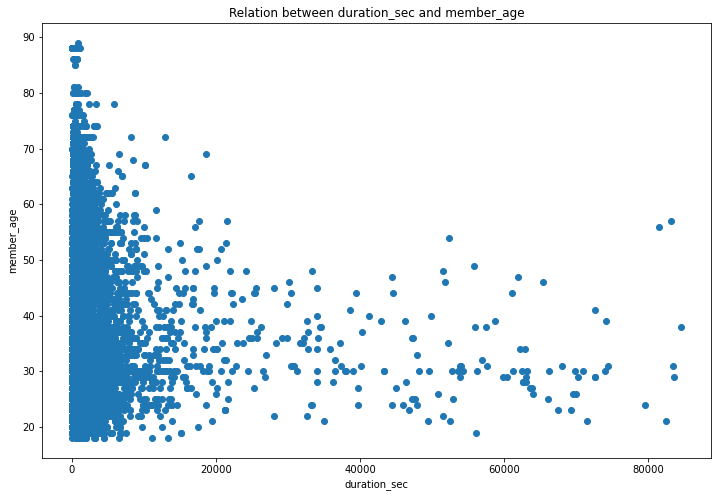

In [35]:
plt.figure(figsize=[12,8])
plt.scatter(data= df_clean,x='duration_sec',y='member_age');
plt.xlabel('duration_sec')
plt.ylabel('member_age')
plt.title('Relation between duration_sec and member_age')

> This drawing shows that as the average life increases, the number of seconds for the trip decreases
- Let's move on to looking at the duration dependency on start_station_id.

Text(0, 0.5, 'duration_sec')

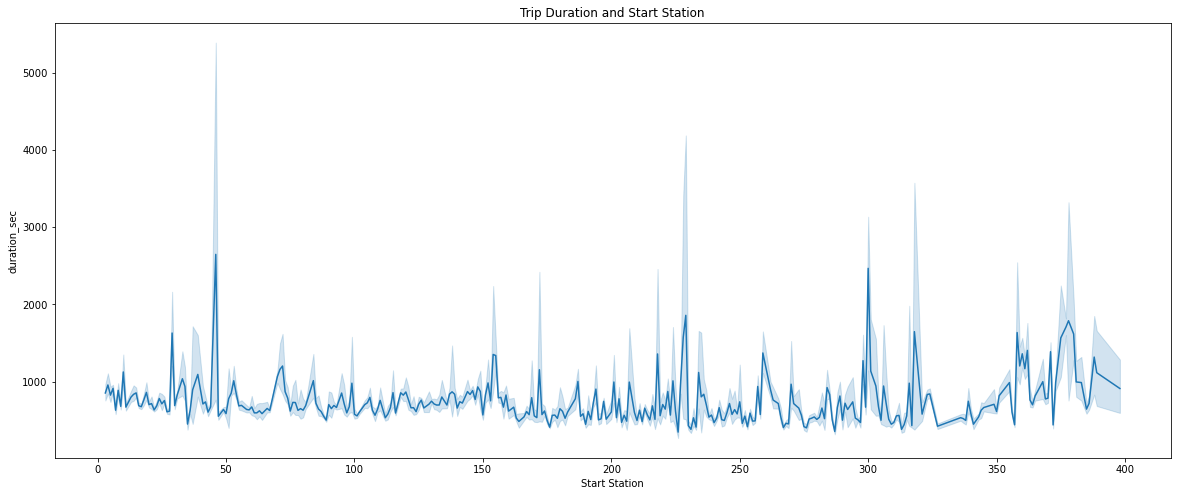

In [36]:
plt.figure(figsize = [20, 8])
sb.lineplot(data= df_clean,x = 'start_station_id', y = 'duration_sec');
plt.title('Trip Duration and Start Station')
plt.xlabel('Start Station')
plt.ylabel('duration_sec')

> you can see that trip duration for some station for start station is higher,as a result, we can see that what stations result in starting of longer trips
- Let's move on to looking at the duration dependency on user_type.

In [37]:
## add new column duration_min to easy plot
df_clean['duration_min'] = df_clean['duration_sec']/60

In [38]:
minute=df_clean.duration_min.value_counts()

Text(0.5, 1.0, 'relation in sec')

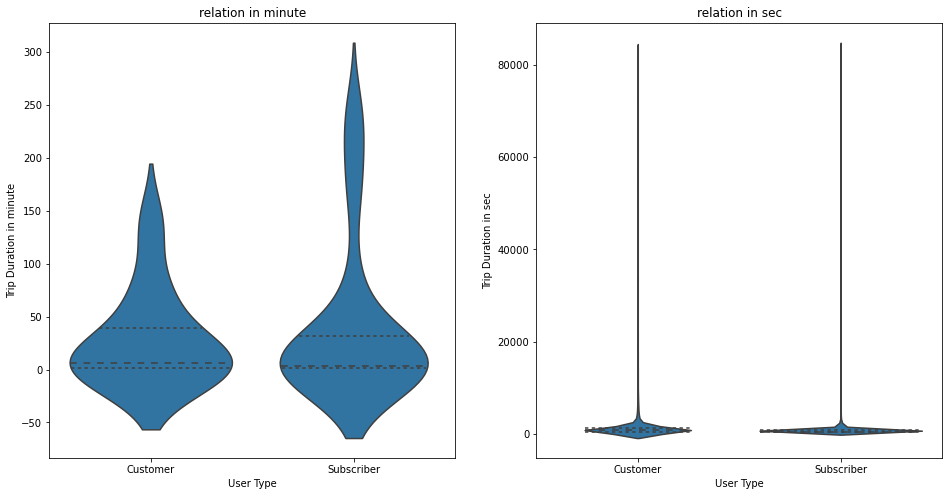

In [39]:
plt.figure(figsize = [16, 8])
plt.subplot(1,2,1)
sb.violinplot(data=df_clean, x='user_type', y=minute, color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in minute');
plt.title('relation in minute')


plt.subplot(1,2,2)
sb.violinplot(data=df_clean, x='user_type', y='duration_sec', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in sec');
plt.title('relation in sec')

> The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall
- Let's move on to looking at the member_gender dependency on user_type.

Text(0.5, 0, 'member gender')

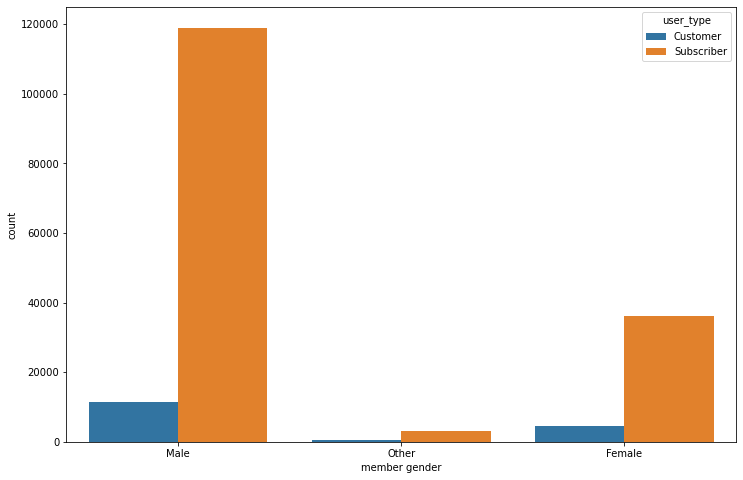

In [40]:
plt.figure(figsize = [12, 8])
sb.countplot(data=df_clean, x='member_gender', hue='user_type');
plt.xlabel('member gender')


> There was much more subscriber usage than casual customers overall.espicialy in male then female
- Let's move on to looking at the duration dependency on Gender.

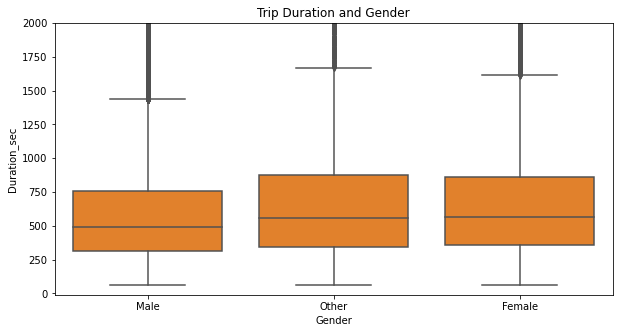

In [41]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

> we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration is so dependendable on the age of the member, when the age between 20 to 45, the trip duration is higher than the older ages

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I thought that variables which are user type and gender values having higher value to get higher trip duration but it is the opposite

> . For gender, value of male members is very high but it got lower trip duration.

## Multivariate Exploration



C:\Users\mostafa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

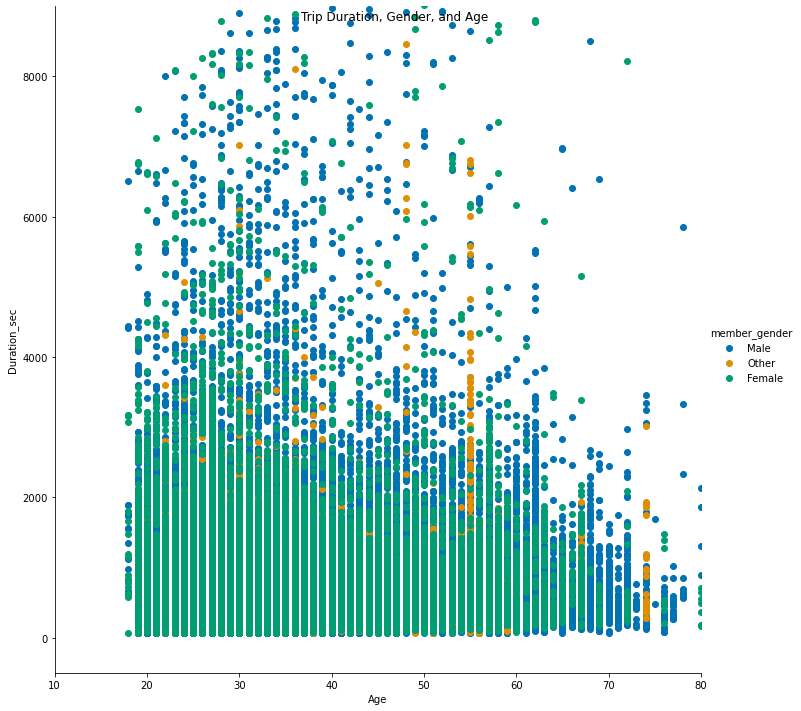

In [47]:
g = sb.FacetGrid(data = df_clean, hue= 'member_gender', palette='colorblind', size = 10,
                 xlim = [10, 80], ylim = [-500, 9000])
g.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)


g.set_xlabels('Age')
g.set_ylabels('Duration_sec')
g.fig.suptitle('Trip Duration, Gender, and Age')
g.add_legend()

### the plotting above is not clear, so let's separate all three genders into different graphs.

C:\Users\mostafa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


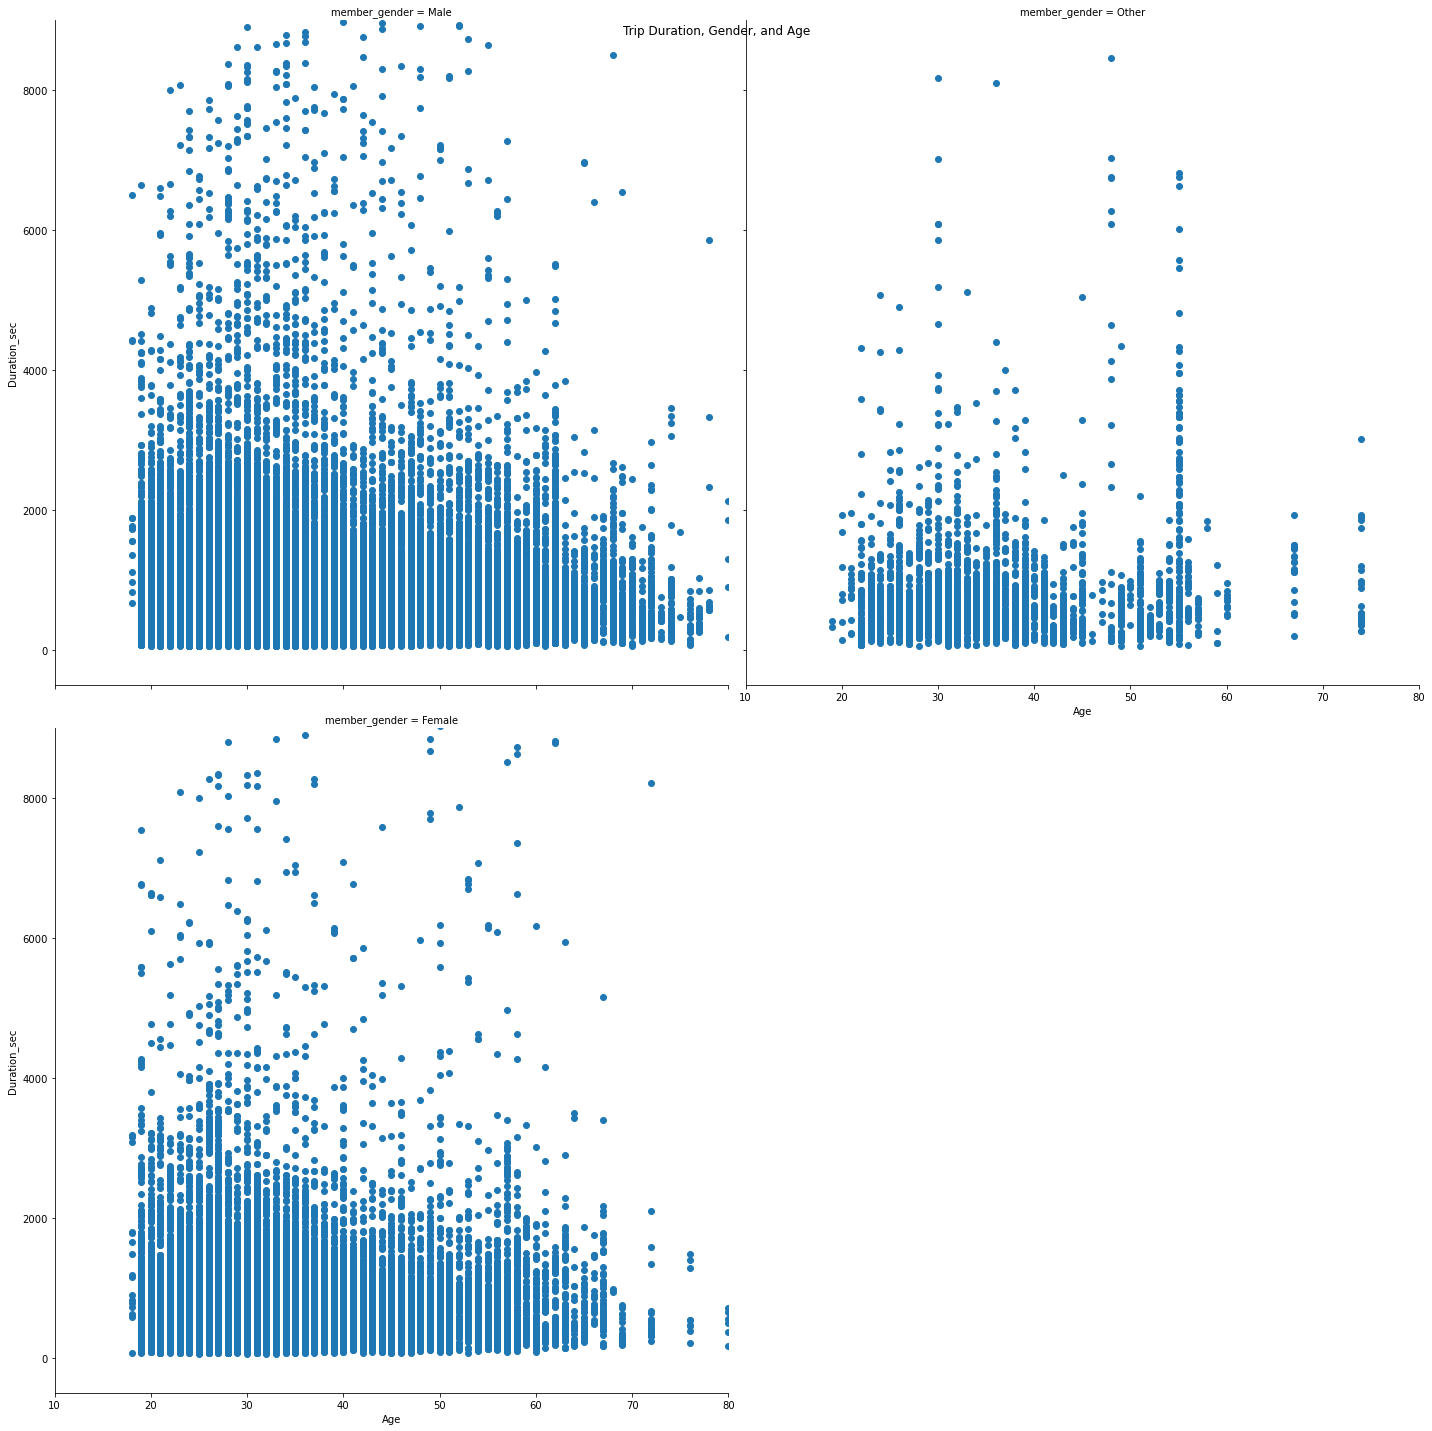

In [48]:
g = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 2, size = 10,
                 xlim = [10, 80], ylim = [-500, 9000])
g.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)


g.set_xlabels('Age')
g.set_ylabels('Duration_sec')
g.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

C:\Users\mostafa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


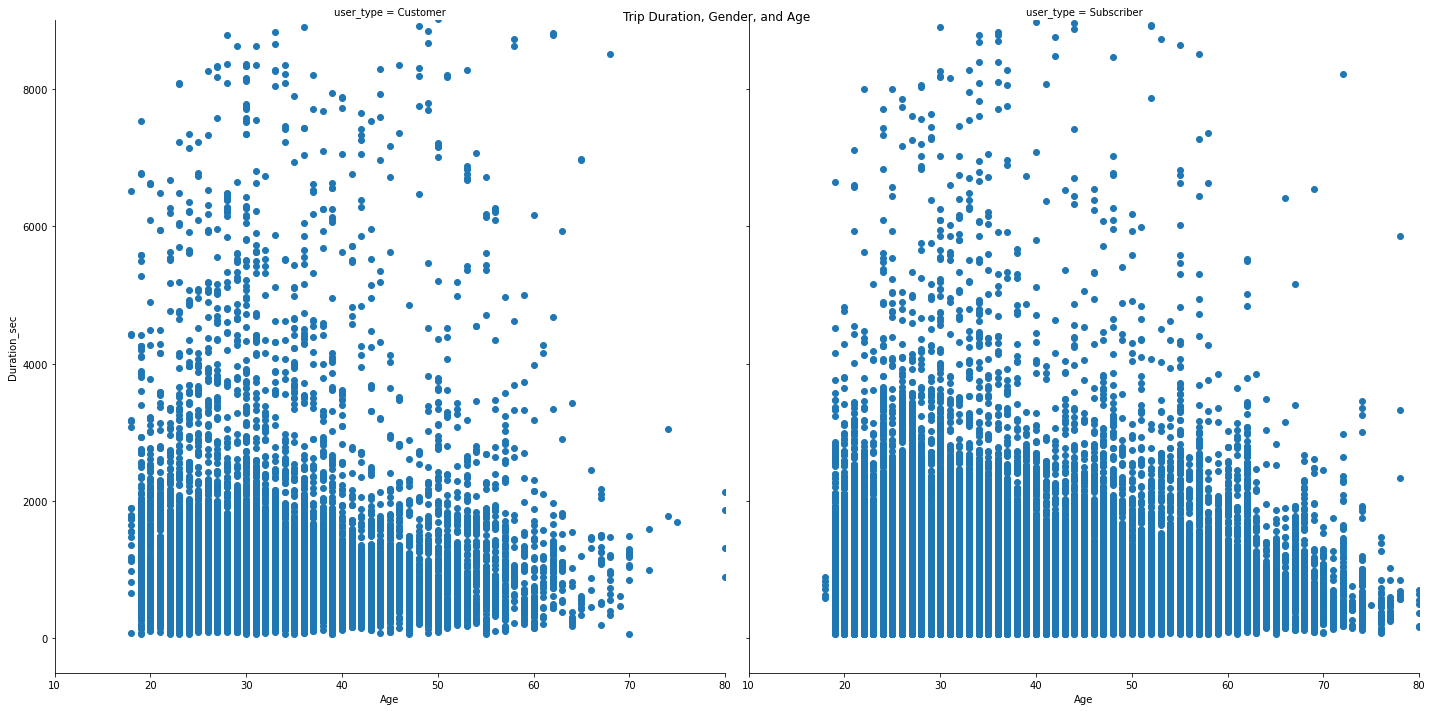

In [49]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 2, size = 10,
                 xlim = [10, 80], ylim = [-500, 9000])
g.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)


g.set_xlabels('Age')
g.set_ylabels('Duration_sec')
g.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

> For the age, duration, and gender, for the others leap at an older age (around 60 years) to got 3000 trip duration.

> For the age, duration, and user type, both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for older age.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that although the number of users for male is higher but percentage is higher for women and other in trip duration. And,for the others leap at an older age (around 60 years) to got 3000 trip duration which is a peak. Also, for subscribers the trip duration is higher than customer for older age

### Were there any interesting or surprising interactions between features?

> gender at an older is a surprise. And, for subscribers the trip duration is higher than customer for older age is a surprise

In [ ]:
 !jupyter nbconvert slide_deck_Ford_GoBike.ipynb --to slides --post serve --no-input --no-prompt